In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

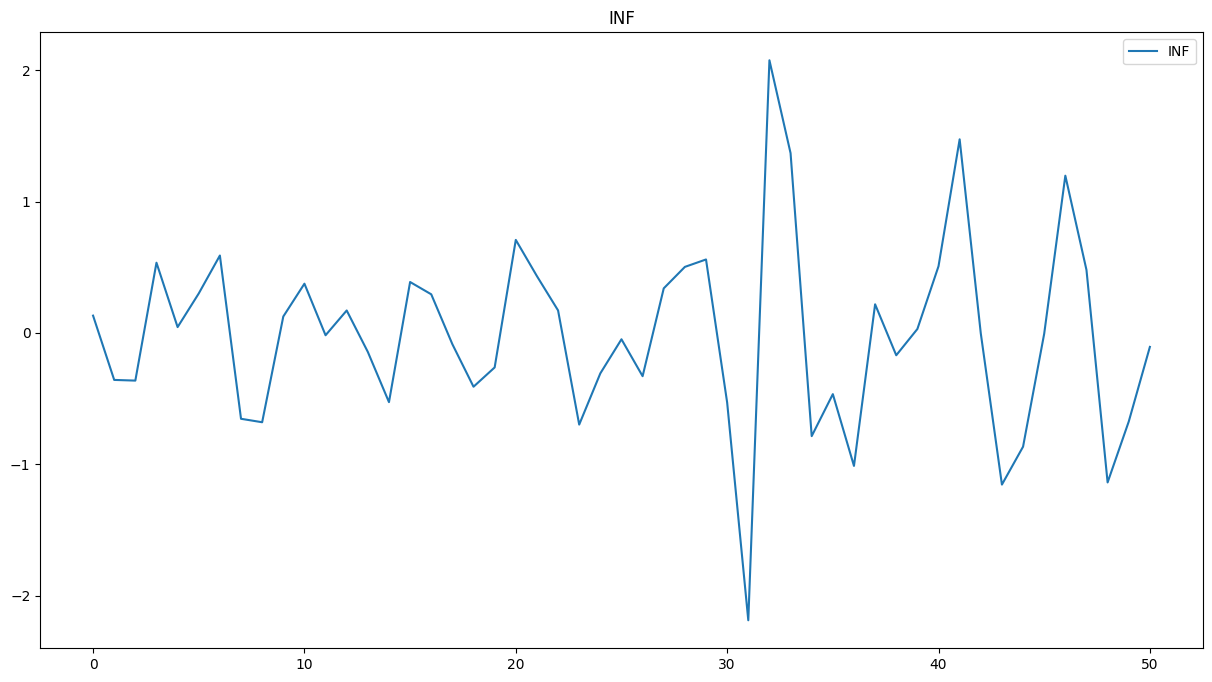

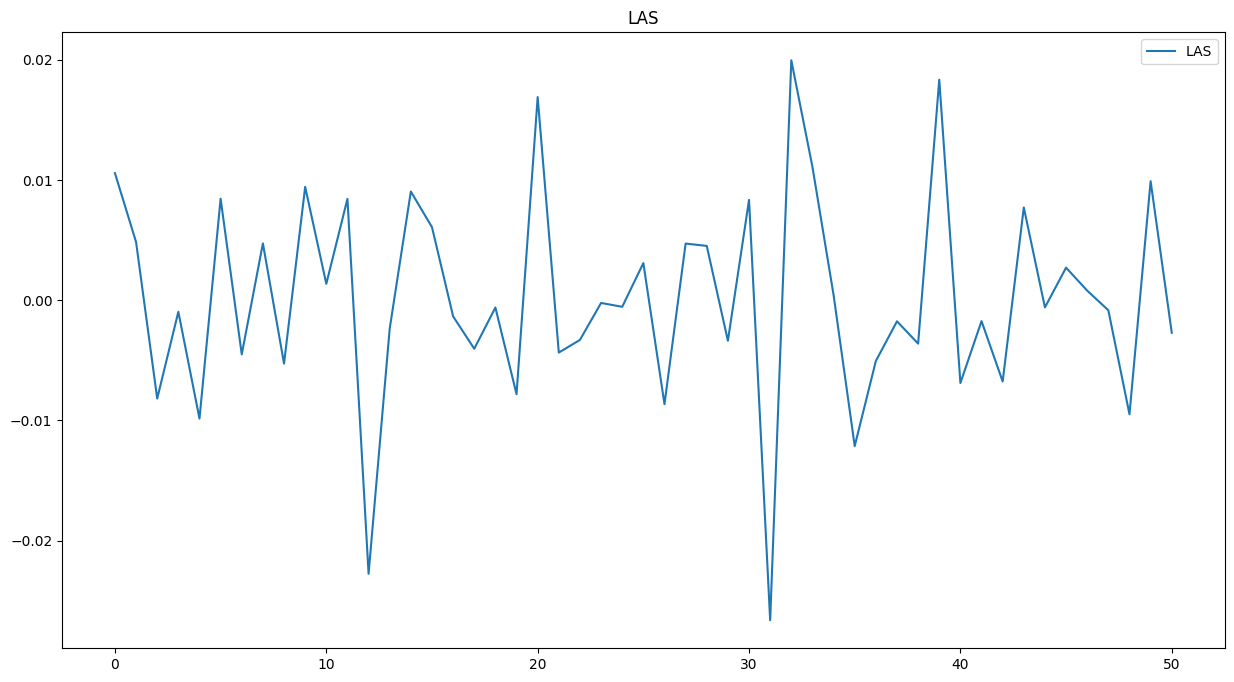

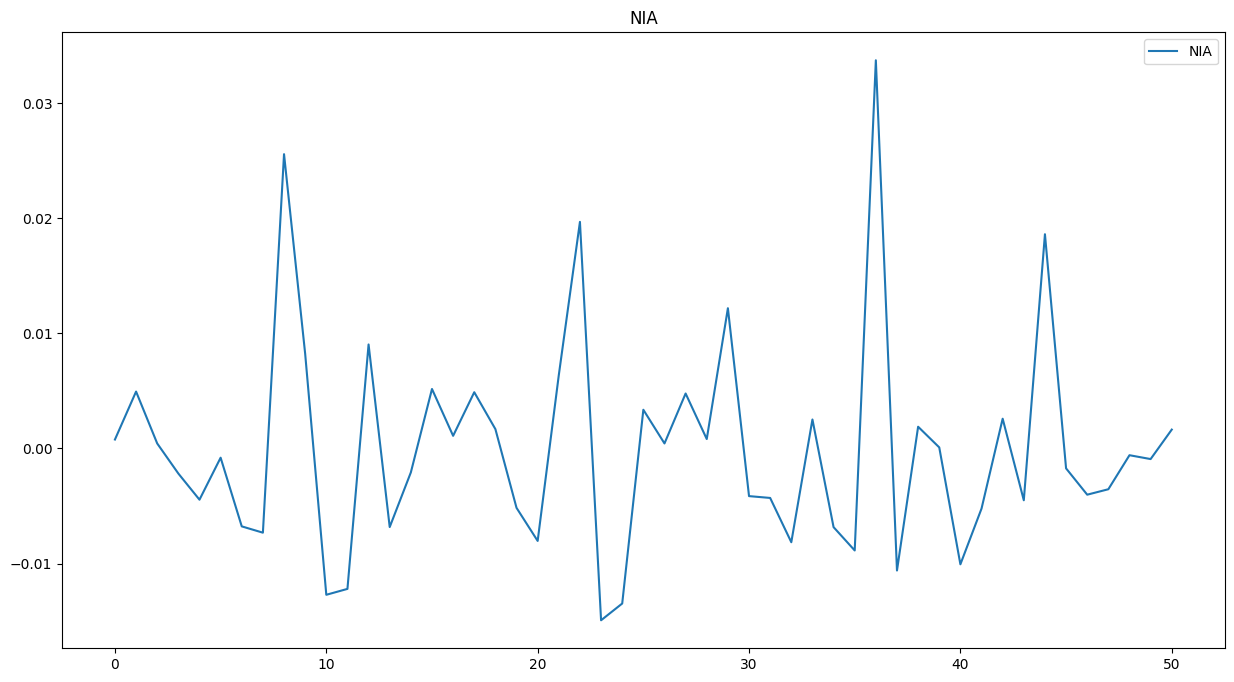

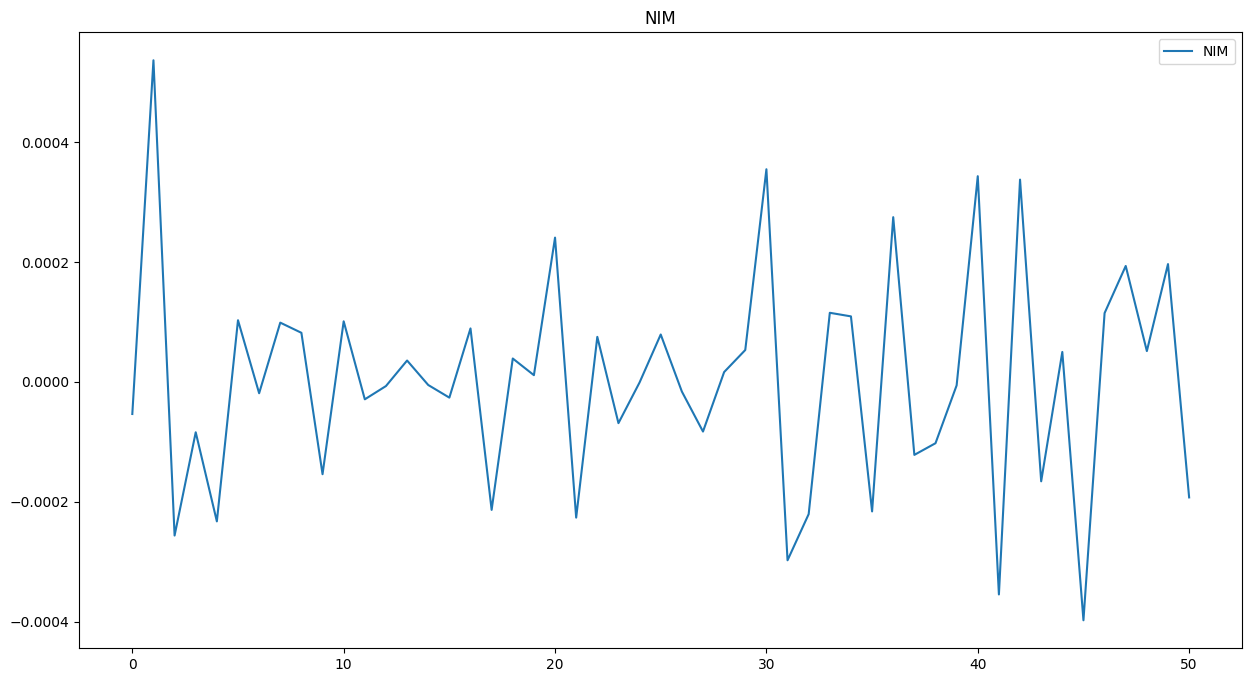

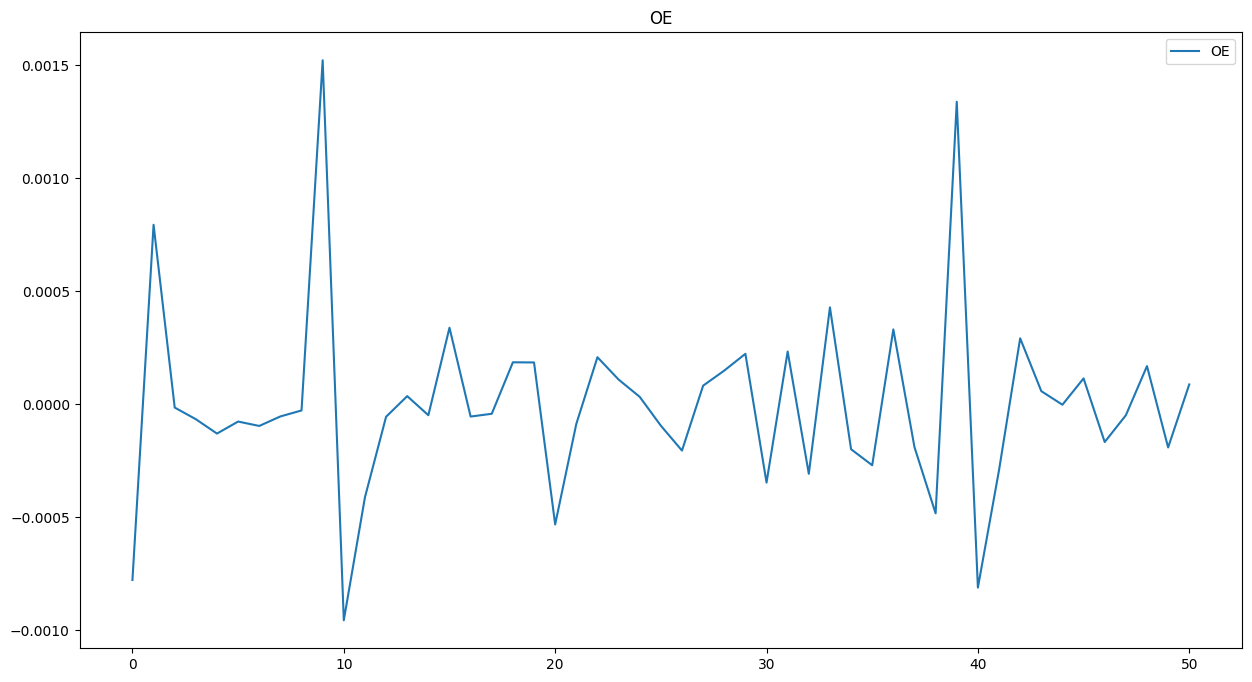

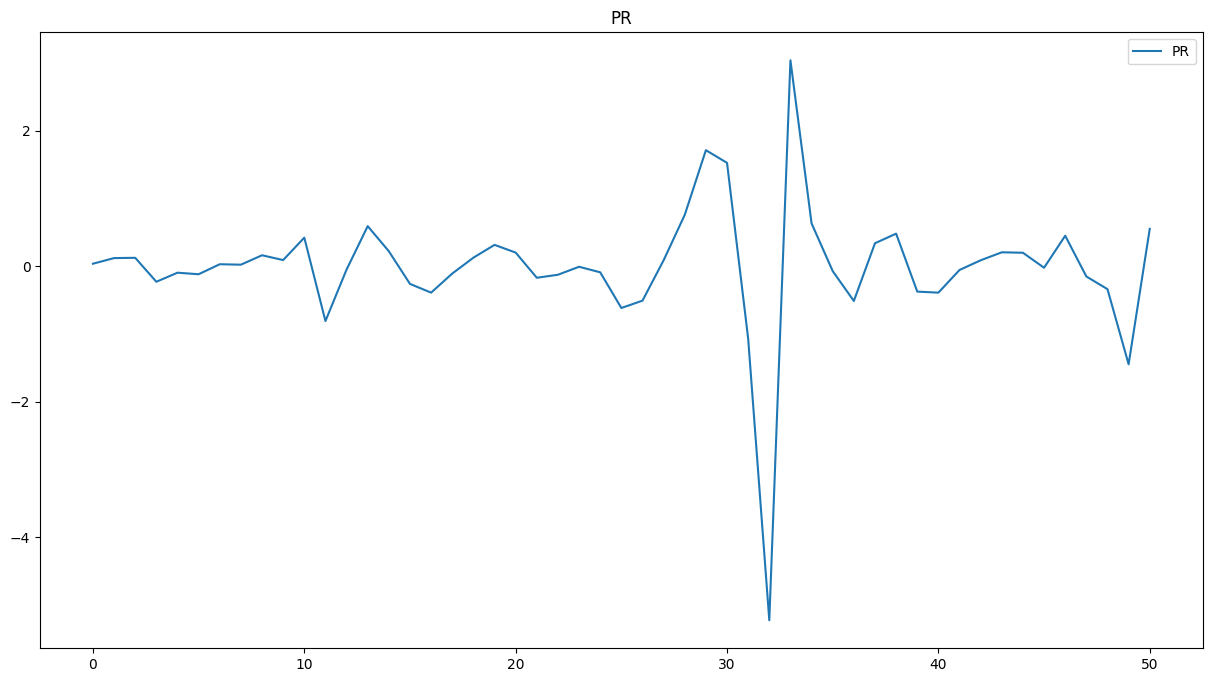

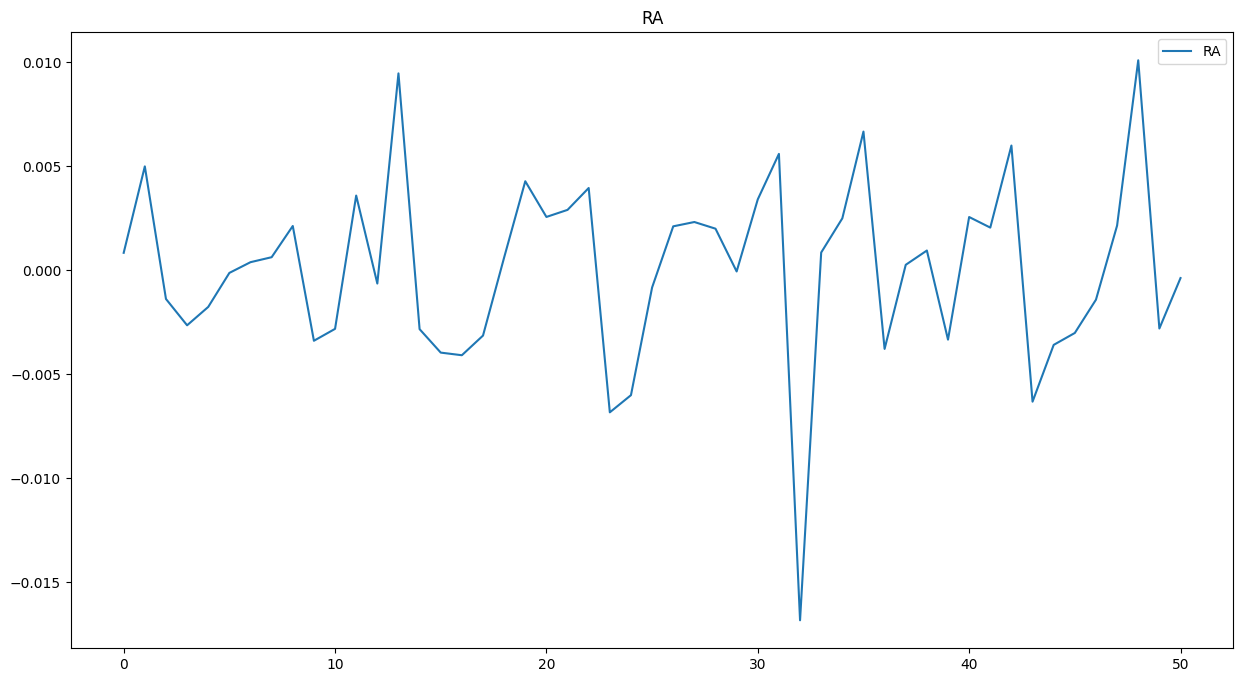

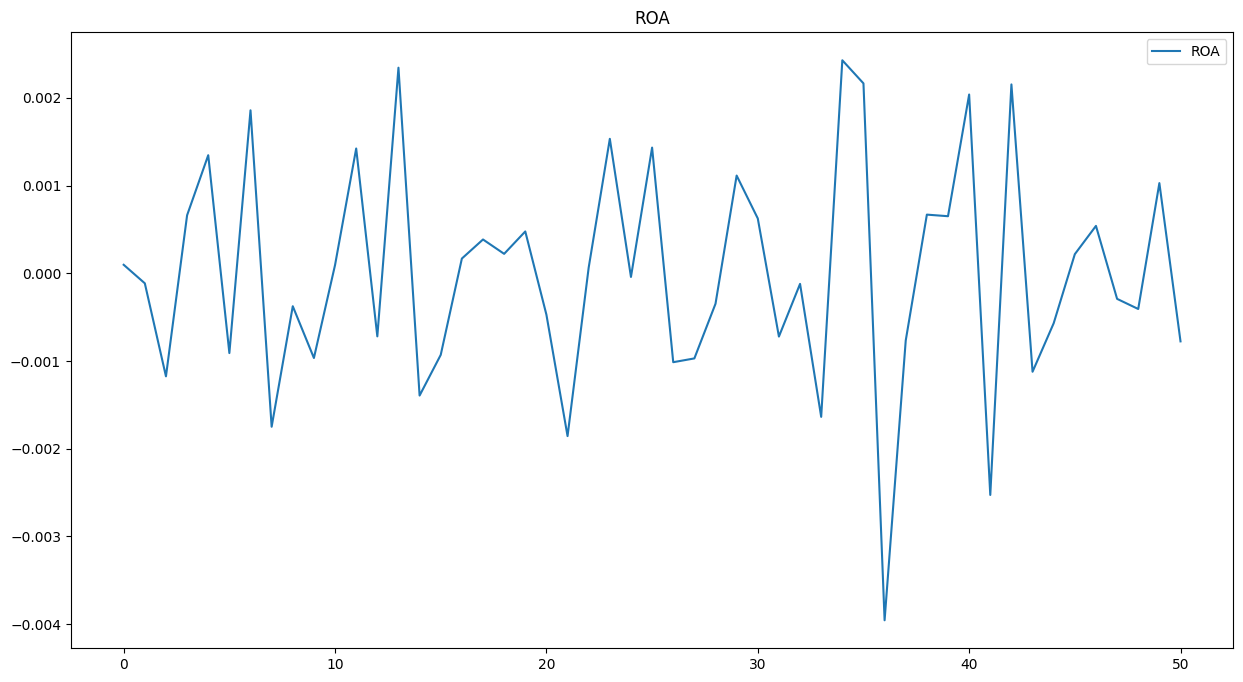

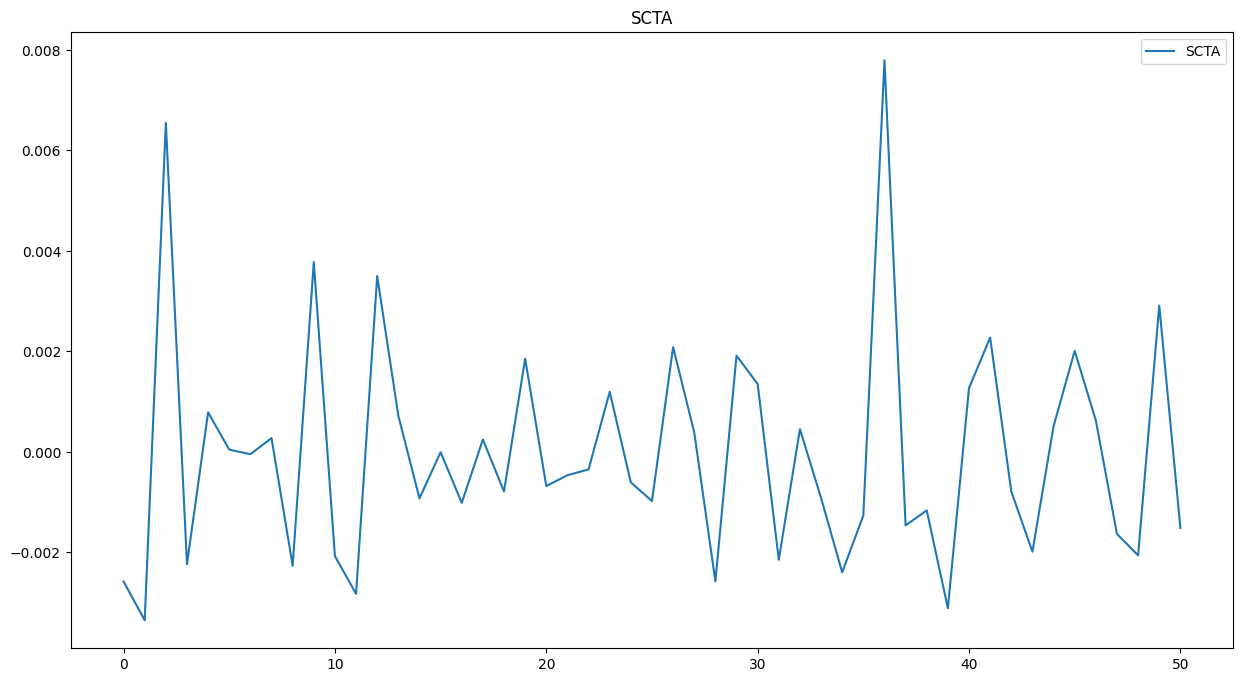

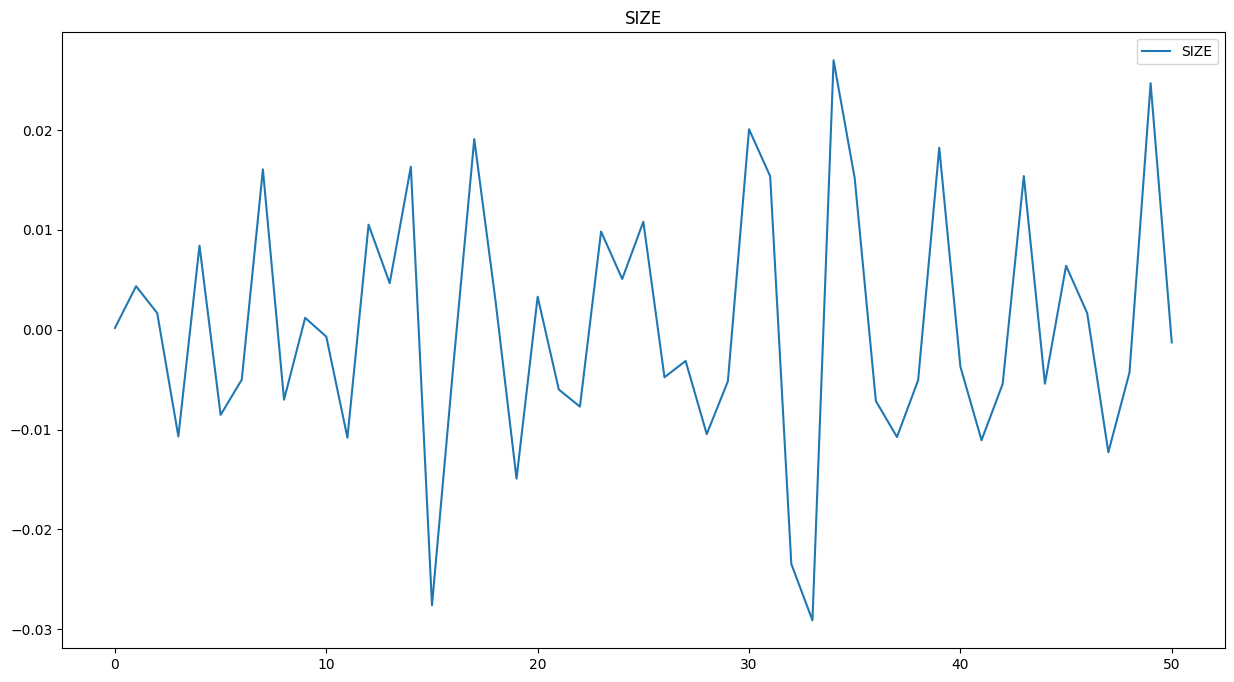

In [96]:
def plotting_plus_p_value(detrended,files):
    df = pd.DataFrame({'Type':["pct","dec_detrend","dec_deseasoned","wavelet"]})
    df.set_index("Type",inplace=True)
    for file in files:
        df[file] = [0,0,0,0]
    dict = {"./../data/9_c_detrend/pct/":"pct",
            "./../data/9_c_detrend/decomposition/detrended/":"dec_detrend",
            "./../data/9_c_detrend/decomposition/deseasoned/":"dec_deseasoned",
            "./../data/9_c_detrend/wavelet/":"wavelet"}
    for dir in detrended:
        for file in files:
            try:
                current = pd.read_csv(dir+file+".csv")
                current.plot(figsize=(15,8),title=file)
                current.dropna(axis = 0, how = 'any', inplace = True)
                df.at[dict[dir],file]=round(adfuller(current[file])[1],3)
            except:
                print(file + ' is  not found')
# detrended = ["./../data/9_c_detrend/pct/",
#             "./../data/9_c_detrend/decomposition/detrended/",
#             "./../data/9_c_detrend/decomposition/deseasoned/",
#             "./../data/9_c_detrend/wavelet/"]
detrended = [
            "./../data/9_c_detrend/wavelet/"]
files = ['INF','LAS','NIA','NIM',
                'OE','PR','RA','ROA','SCTA','SIZE']

df = plotting_plus_p_value(detrended,files)
df

,pivdennyi bank_CR,pivdennyi bank_CDR,pivdennyi bank_LAS,pivdennyi bank_NIA,pivdennyi bank_NIM,pivdennyi bank_OE,pivdennyi bank_RA,pivdennyi bank_ROA,pivdennyi bank_SCTA,pivdennyi bank_SIZE
Type,,,,,,,,,,
pct,0.000,0,0,0,0,0,0,0,0,0
dec_detrend,0.000,0,0,0,0,0,0,0,0,0
dec_deseasoned,0.000,0,0,0,0,0,0,0,0,0
wavelet,0.003,0,0,0,0,0,0,0,0,0


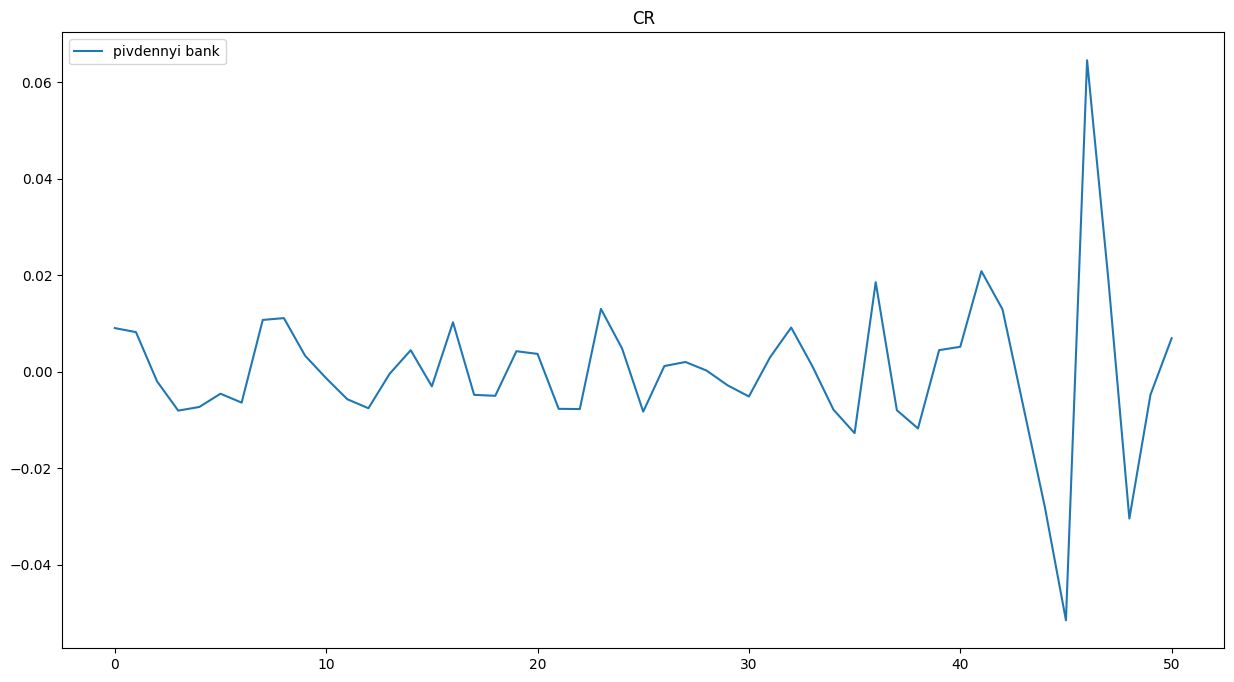

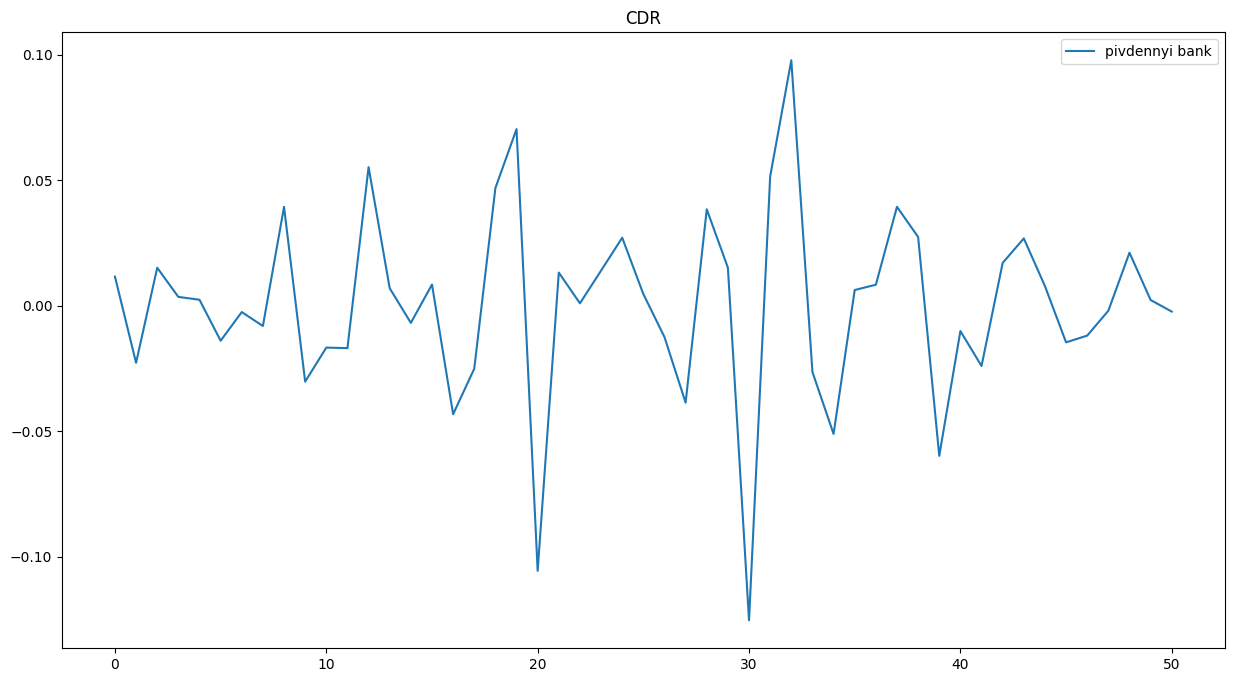

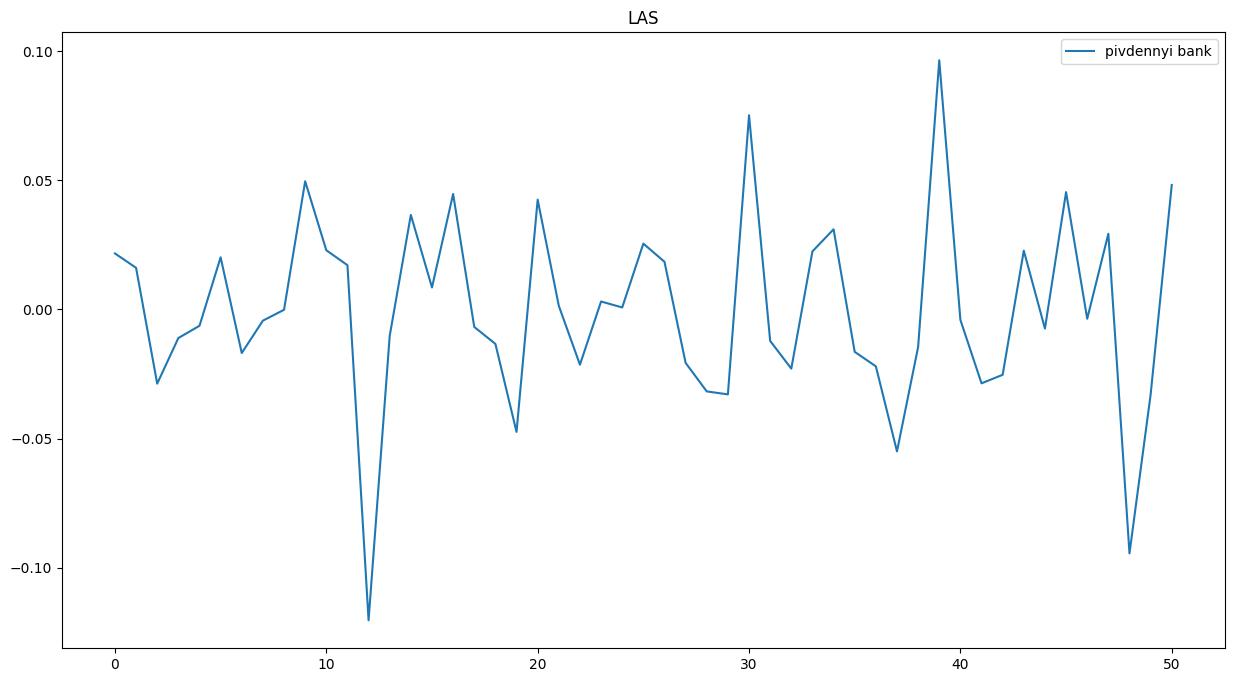

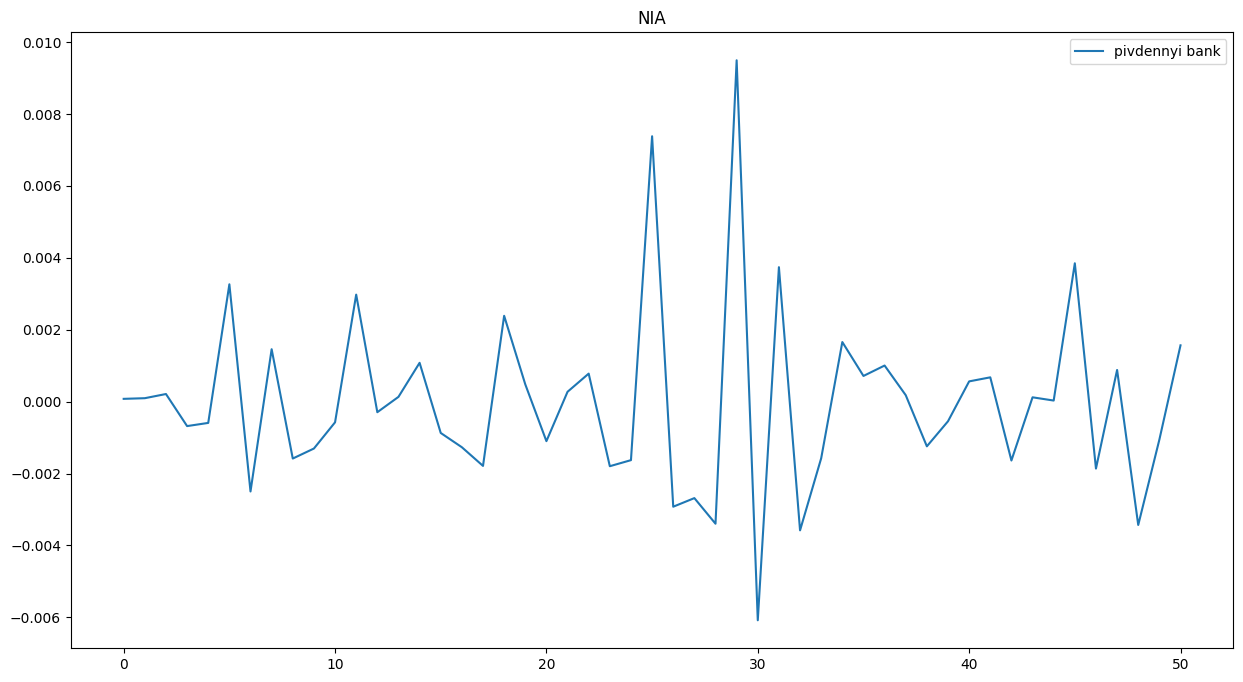

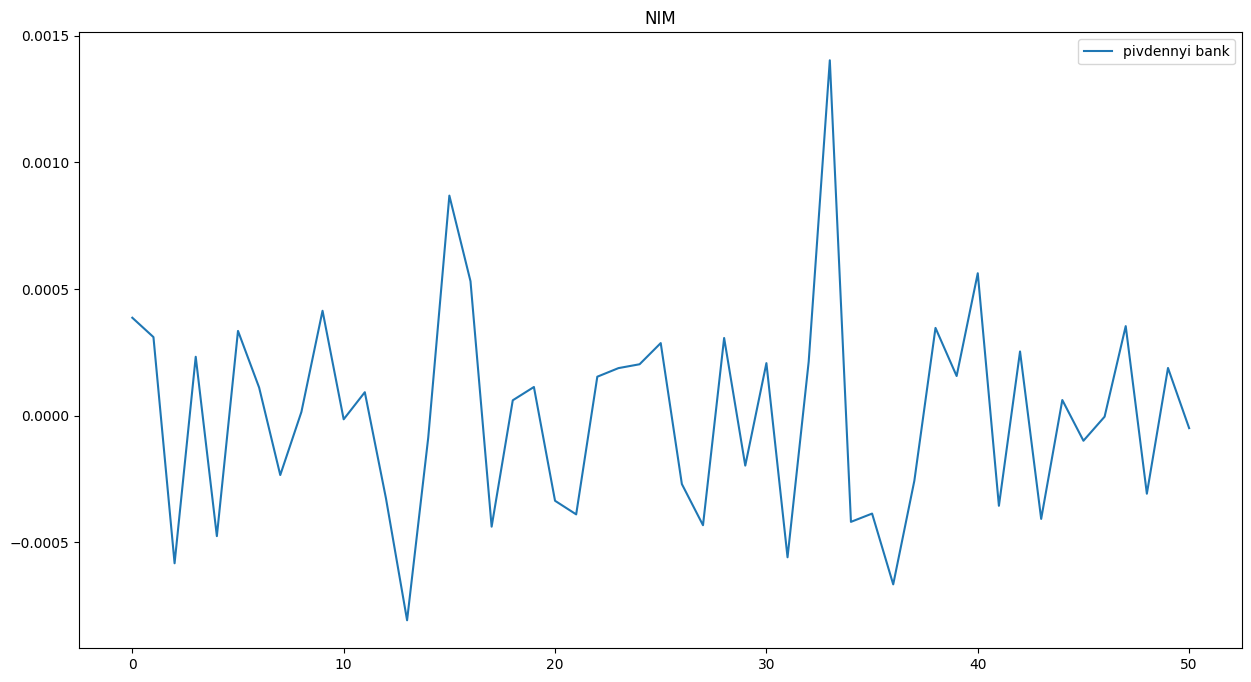

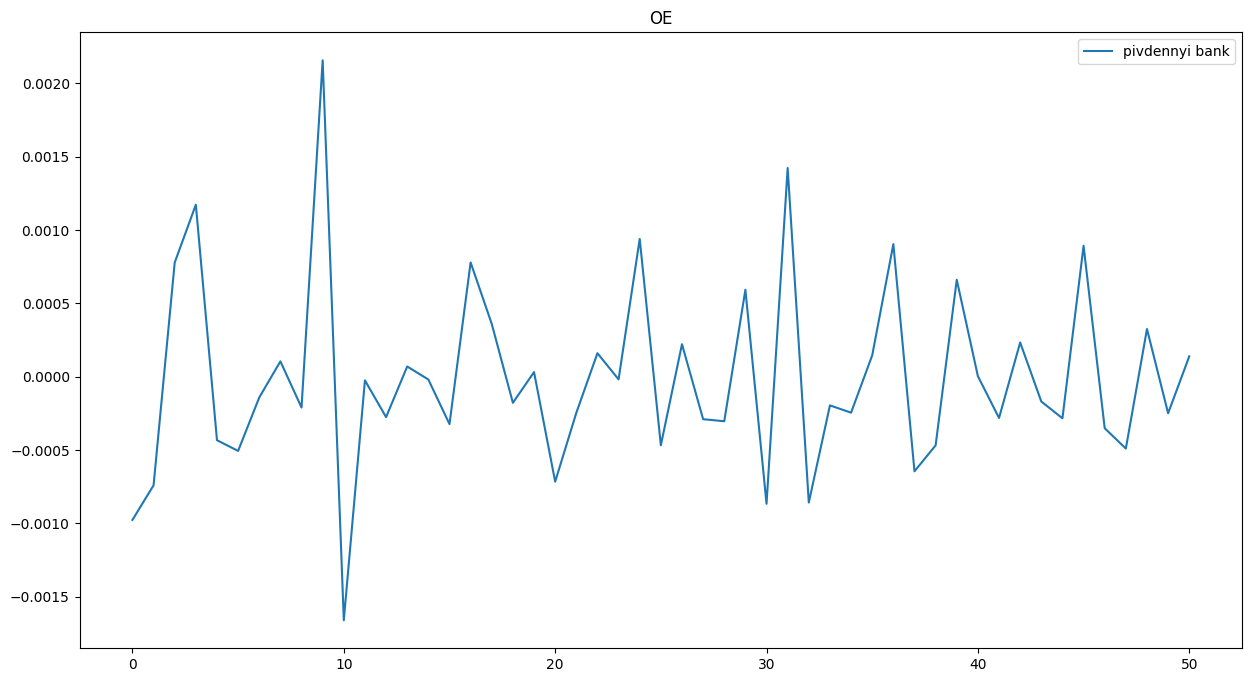

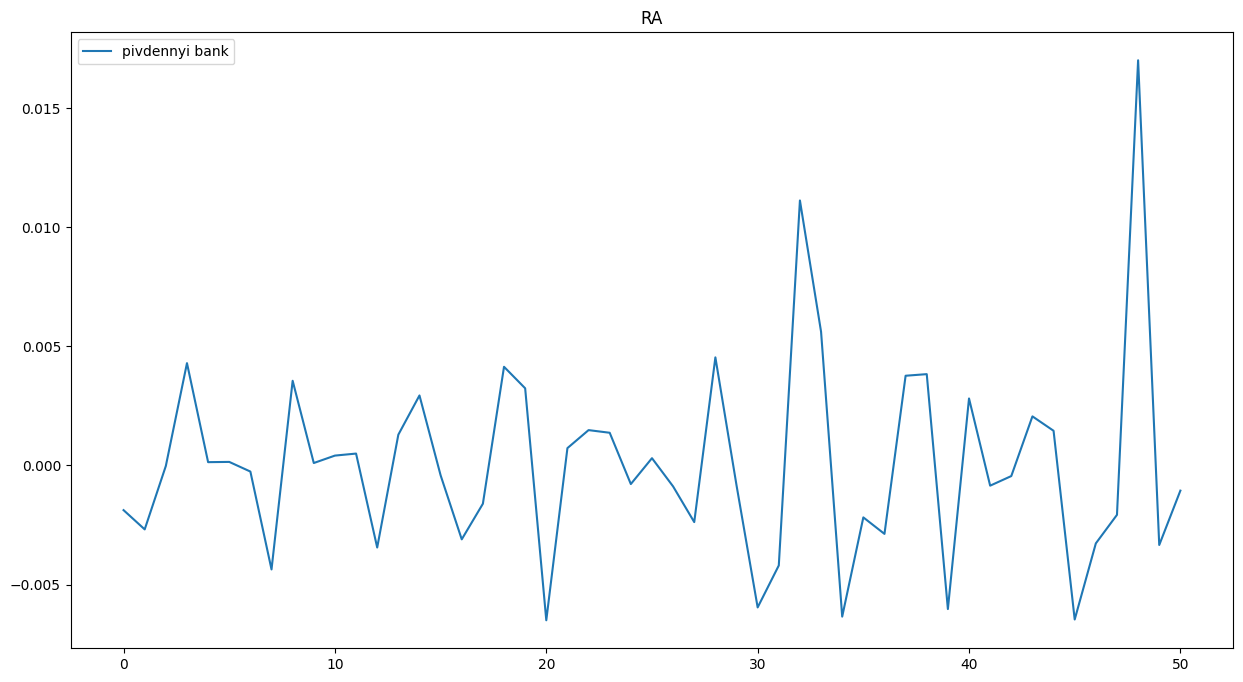

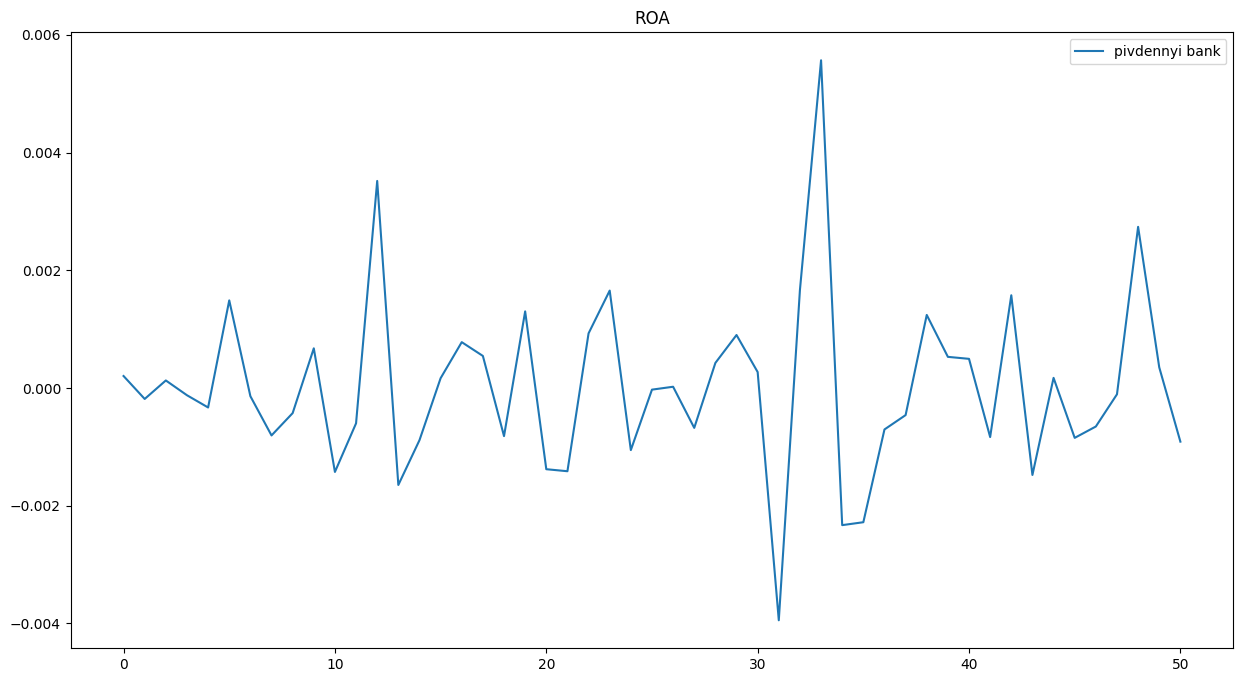

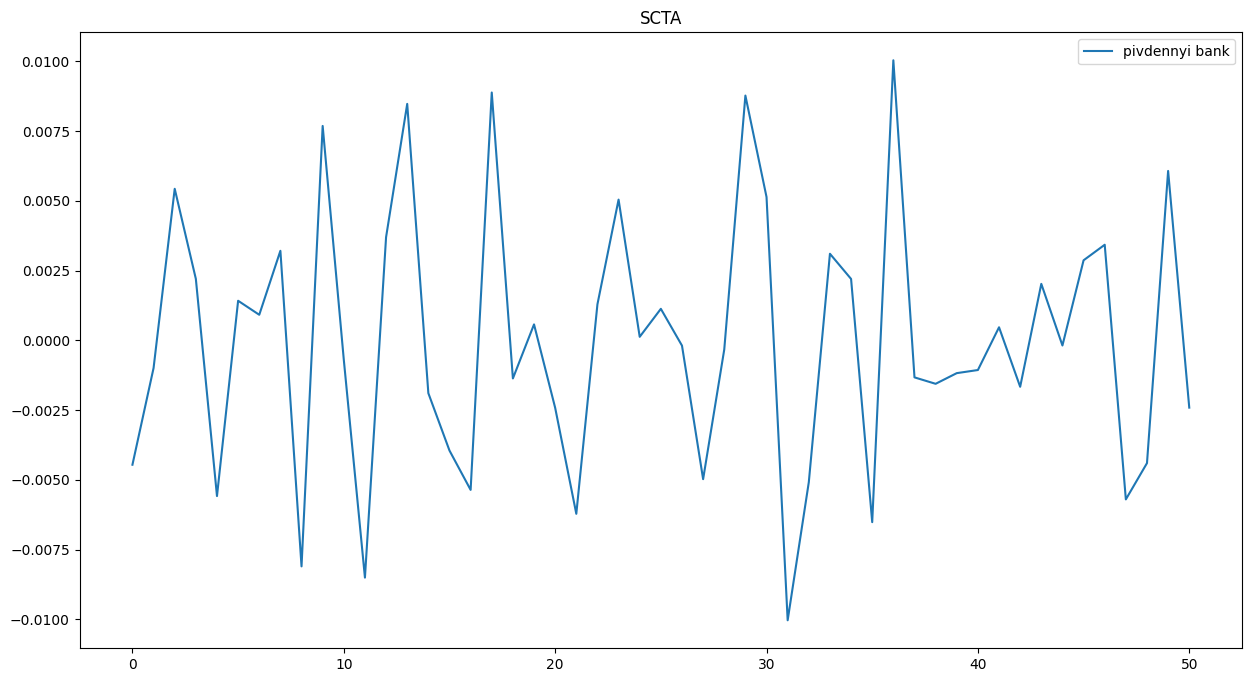

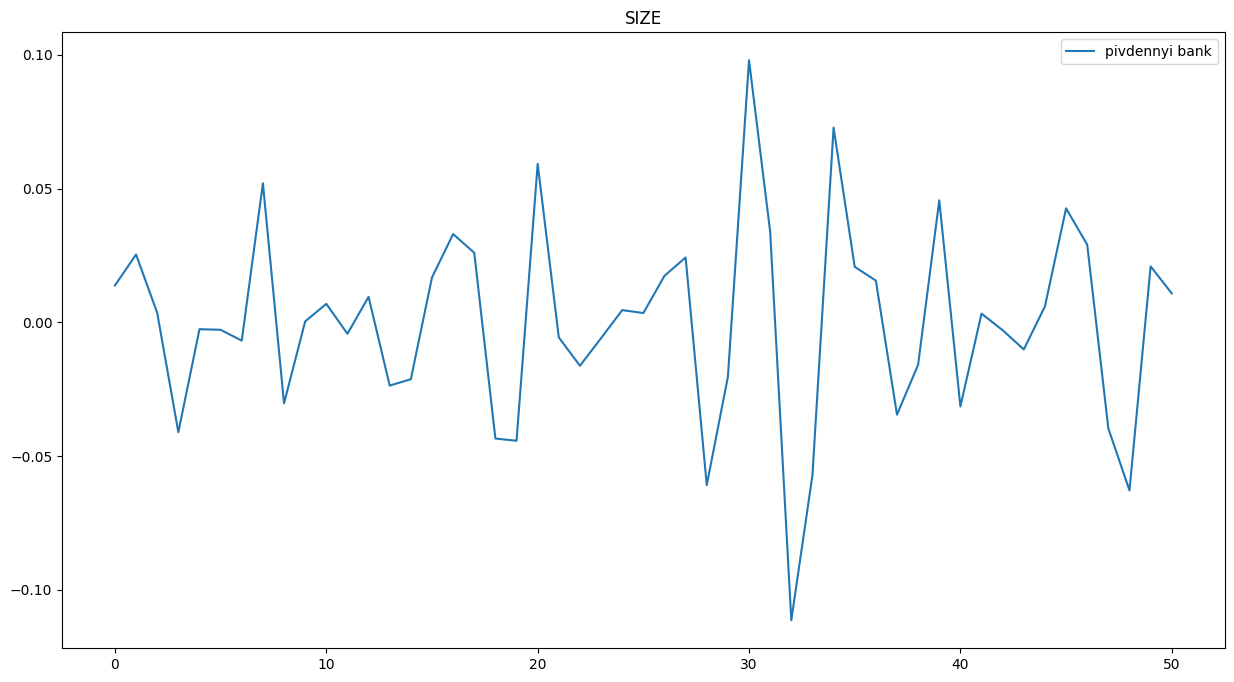

In [97]:
def plotting_banks_plus_p_value(detrended,all_banks,files):
    
    df = pd.DataFrame({'Type':["pct","dec_detrend","dec_deseasoned","wavelet"]})
    df.set_index("Type",inplace=True)
    for file in files:
        for bank in all_banks:
            df[bank+"_"+file] = [0,0,0,0]
    dict = {"./../data/10_detrend/pct/":"pct",
            "./../data/10_detrend/decomposition/detrended/":"dec_detrend",
            "./../data/10_detrend/decomposition/deseasoned/":"dec_deseasoned",
            "./../data/10_detrend/wavelet/":"wavelet"}
    for dir in detrended:
        for file in files:
            current = pd.read_csv(dir+file+".csv")
            to_del = []
            for i in range(1,len(current.columns)):
                if current.columns[i] not in all_banks:
                    to_del.append(current.columns[i])    
            current.drop(columns=to_del, inplace=True)
            current.plot(figsize=(15,8),title=file)
            current.dropna(axis = 0, how = 'any', inplace = True)
            for bank in all_banks:
                df.at[dict[dir],bank+"_"+file]=round(adfuller(current[bank])[1],3)
    return df
# detrended = ["./../data/10_detrend/pct/",
#             "./../data/10_detrend/decomposition/detrended/",
#             "./../data/10_detrend/decomposition/deseasoned/",
#             "./../data/10_detrend/wavelet/"]
# all_banks = ['cb privatbank','credit agricole bank','fuib','kredobank','oschadbank','otp bank','pivdennyi bank','raiffeisen bank','sense bank','ukrsibbank','universal bank']
detrended = [
            "./../data/10_detrend/wavelet/"]
all_banks = ['pivdennyi bank']
files = ['CR','CDR','LAS','NIA','NIM',
                'OE','RA','ROA','SCTA','SIZE']
df=plotting_banks_plus_p_value(detrended,all_banks,files)
df